In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LR
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [54]:
df = pd.read_json('oil.json')
df.rename(columns={"Back to Contents" : "Date", "Data 3: Regular All Areas All Formulations":"USD per Gallon"}, inplace=True)
df = df[2:]

#change date format
df["Date"] = pd.to_datetime(df["Date"])
df = df[(df["Date"] >= '2021-01-01') & (df["Date"] <= '2023-12-31')]
df.reset_index(drop=True, inplace=True)
df["USD per Gallon"] = df["USD per Gallon"].astype('float')
print(df)

          Date  USD per Gallon   
0   2021-01-04           2.249   
1   2021-01-11           2.317   
2   2021-01-18           2.379   
3   2021-01-25           2.392   
4   2021-02-01           2.409   
..         ...             ... ..
151 2023-11-27           3.238   
152 2023-12-04           3.231   
153 2023-12-11           3.136   
154 2023-12-18           3.053   
155 2023-12-25           3.116   

[156 rows x 3 columns]


In [55]:
df1 = pd.read_json('gold.json')
df1.rename(columns={"date" : "Date", "USD":"USD per Troy Ounce"}, inplace=True)
df1 = df1[df1["Date"].isin(df["Date"])]
df1.reset_index(drop=True, inplace=True)
df1["USD per Troy Ounce"] = df1["USD per Troy Ounce"].str.replace(',','')
df1["USD per Troy Ounce"] = df1["USD per Troy Ounce"].astype('float')

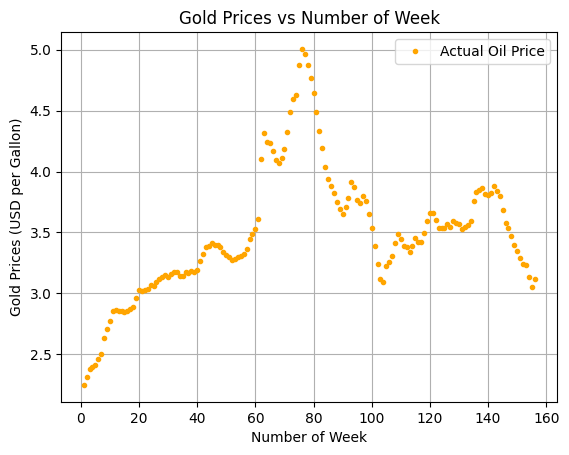

In [56]:
y1 = df['USD per Gallon'] #Oil
x1 = np.arange(1, y1.shape[0]+1)

plt.plot(x1, y1, '.',color='orange', label='Actual Oil Price')

plt.xlabel("Number of Week")
plt.ylabel("Gold Prices (USD per Gallon)")  # Corrected label
plt.title("Gold Prices vs Number of Week")
plt.legend()
plt.grid(True, 'major')
plt.show()

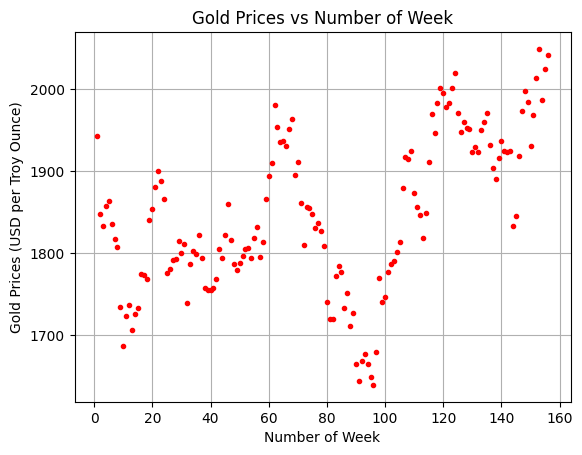

In [57]:
y2 = df1['USD per Troy Ounce'] #gold
x1 = np.arange(1, df.shape[0]+1)

plt.plot(x1, y2, '.',color='red', label='Actual Gold Prices')

plt.xlabel("Number of Week")
plt.ylabel("Gold Prices (USD per Troy Ounce)")  # Corrected label
plt.title("Gold Prices vs Number of Week")
plt.grid(True, 'major')
plt.show()

In [58]:
Time = np.arange(1, df.shape[0]+1)
Gold_Price = df1["USD per Troy Ounce"]

X = pd.DataFrame({"Week" : Time, "USD per Troy Ounce" : Gold_Price})
Y = df["USD per Gallon"]

#Linear Regression
model = LR()
model.fit(X, Y)

#Beta 1 and 2
print(f"Coefficients of Beta1 and Beta2 {model.coef_}")
print(f"Intercept or Beta0 [{model.intercept_}]")

Coefficients of Beta1 and Beta2 [ 0.00623387 -0.00117011]
Intercept or Beta0 [5.163579555739726]


Text(0.5, 0, 'Oil Prices')

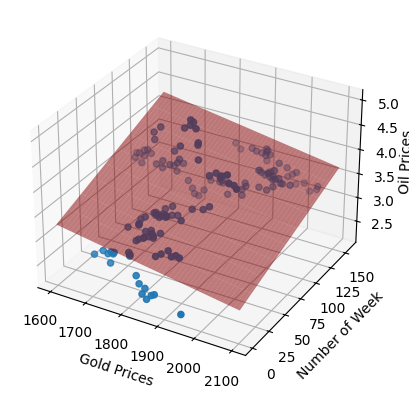

In [59]:
#plot the graph

x1_pred, x2_pred = np.meshgrid(np.linspace(1, df.shape[0]+1, 10), np.linspace(1600, 2100, 100))

zModel = model.intercept_ + (model.coef_[0] * x1_pred) + (model.coef_[1] * x2_pred)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#acutal data
ax.scatter(Gold_Price, Time, Y) #Y=Oil Price

#regression line
ax.plot_surface(x2_pred, x1_pred, zModel, color = "red", alpha = 0.5)

ax.set_xlabel('Gold Prices')
ax.set_ylabel('Number of Week')
ax.set_zlabel('Oil Prices', labelpad=0)


# only time influence the price

Coefficients Beta1 [0.00495649]
Intercept or Beta0 [3.1034603804797354]


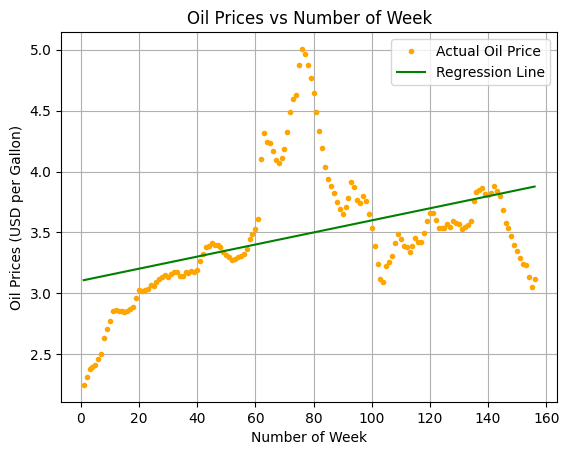

In [60]:

y1 = df['USD per Gallon'] #Oil
x1 = np.arange(1, y1.shape[0]+1).reshape(-1, 1) #transform into column

modelOil = LR()
modelOil.fit(x1,y1)

oilregression = modelOil.intercept_ + (modelOil.coef_[0] * x1)

print(f"Coefficients Beta1 {modelOil.coef_}")
print(f"Intercept or Beta0 [{modelOil.intercept_}]")

plt.plot(x1, y1, '.',color='orange', label='Actual Oil Price')
plt.plot(x1, oilregression, color = "green", label = 'Regression Line')

plt.xlabel("Number of Week")
plt.ylabel("Oil Prices (USD per Gallon)")  # Corrected label
plt.title("Oil Prices vs Number of Week")
plt.legend()
plt.grid(True)

Coefficients Beta1 [1.09167691]
Intercept or Beta0 [1760.6245161290321]


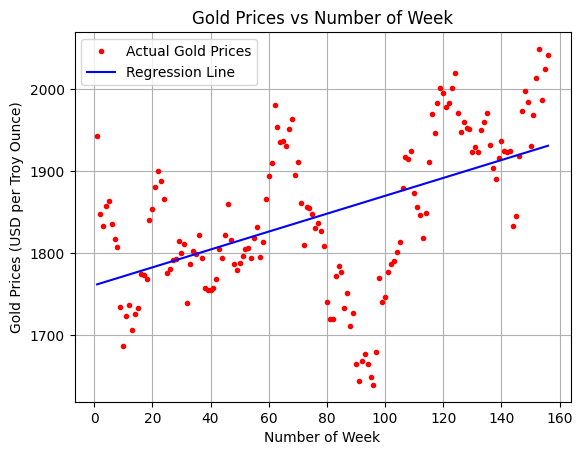

In [61]:
y2 = df1['USD per Troy Ounce'] #gold
x1 = np.arange(1, df.shape[0]+1).reshape(-1,1) #transform into column

modelGold = LR()
modelGold.fit(x1,y2)

goldregression = modelGold.intercept_ + (modelGold.coef_[0] * x1)

print(f"Coefficients Beta1 {modelGold.coef_}")
print(f"Intercept or Beta0 [{modelGold.intercept_}]")

plt.plot(x1, y2, '.',color='red', label='Actual Gold Prices')
plt.plot(x1, goldregression, color = "blue", label = 'Regression Line')

plt.xlabel("Number of Week")
plt.ylabel("Gold Prices (USD per Troy Ounce)")  # Corrected label
plt.title("Gold Prices vs Number of Week")
plt.grid(True)
plt.legend()